# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python, разберётесь в том, как работает свёртка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук — это аналоговый сигнал, то есть он является непрерывным по времени и по значениям. Чтобы работать со звуком на цифровом устройстве, необходимо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбранные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала.


## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять его частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

3. Чем .wav отличается от других кодеков, например, .mp3 или .ogg?


### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля `IPython.display`, а для отрисовки — `matplotlib`.

**1**. В файле **.wav** хранится *несжатый* оцифрованный аудиопоток. Файл в таком формате можно разделить на две смысловые части: заголовок и область данных.

В заголовке файла хранится информация о:
* размере файла;
* количестве каналов;
* частоте дискретизации;
* количестве бит в отсчёте (эту величину ещё называют глубиной звучания).

В области данных содержатся значения амплитуды звуковой волны в определённые моменты времени.

Соответственно, чтобы узнать параметры дискретизации и квантования файла, необходимо прочитать информацию из его заголовка.

**2**.

In [1]:
!pip install -q pydub

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.signal

In [3]:
# Display signal in time domain
def draw_waveform(wav, sr, figsize=(16, 8)):
    plt.figure(figsize=figsize)
    librosa.display.waveplot(wav, sr=sr)

In [4]:
# This script allows to record audio
# right in the Google Colab notebook! :)

from google.colab import output as colab_output
from base64 import b64decode
from io import BytesIO
from pydub import AudioSegment
import IPython.display as ipd


RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""


def record(seconds=1):
    display(ipd.Javascript(RECORD))
    print(f"Recording started for {seconds} seconds.")
    s = colab_output.eval_js("record(%d)" % (seconds * 1000))
    print("Recording ended.")
    b = b64decode(s.split(",")[1])

    fileformat = "wav"
    filename = f"recorded_audio.{fileformat}"
    AudioSegment.from_file(BytesIO(b)).export(filename, format=fileformat)
    return librosa.core.load(filename)

Number of samples: 44303. Sample rate: 22050.


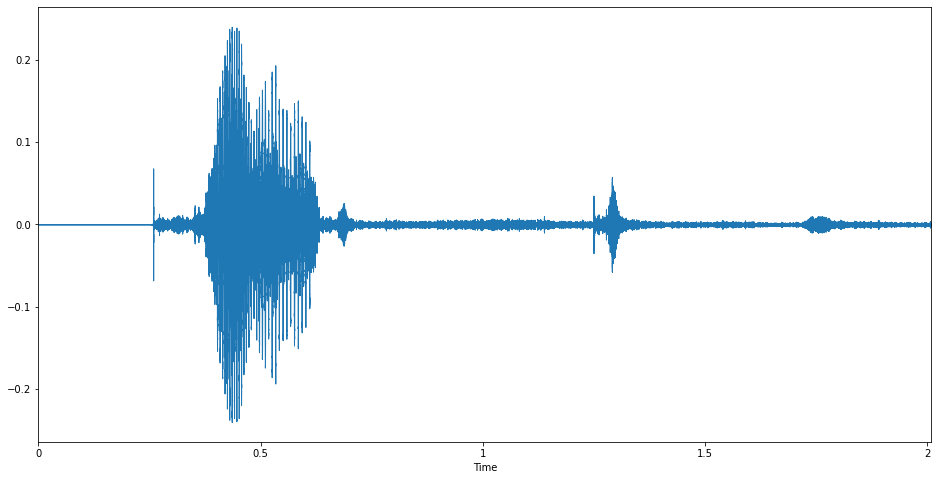

In [5]:
# Use the first line to record audio right in Google Colab:
# waveform, sample_rate = record(2)
waveform, sample_rate = librosa.core.load("resources/recorded_audio.wav")

print(f"Number of samples: {len(waveform)}. Sample rate: {sample_rate}.")
draw_waveform(waveform, sr=sample_rate)
ipd.Audio(waveform, rate=sample_rate)

Воспользуемся методом `librosa.resample`, чтобы изменить частоту дискретизации записи без необходимости осуществления записи снова.

In [6]:
def resample_waveform(sr=8000):
    resampled = librosa.resample(waveform, sample_rate, sr)

    print(f"Number of samples: {len(resampled)}. Sample rate: {sr}.")
    # draw_waveform(resampled, sr=sr)
    ipd.display(ipd.Audio(resampled, rate=sr))

In [7]:
resample_waveform(16000)

Number of samples: 32148. Sample rate: 16000.


In [8]:
resample_waveform(12000)

Number of samples: 24111. Sample rate: 12000.


In [9]:
resample_waveform(8000)

Number of samples: 16074. Sample rate: 8000.


In [10]:
resample_waveform(4000)

Number of samples: 8037. Sample rate: 4000.


In [11]:
resample_waveform(2000)

Number of samples: 4019. Sample rate: 2000.


In [12]:
resample_waveform(1000)

Number of samples: 2010. Sample rate: 1000.


In [13]:
resample_waveform(750)

Number of samples: 1507. Sample rate: 750.


In [14]:
resample_waveform(500)

Number of samples: 1005. Sample rate: 500.


Речь становится неразличимой при частоте дискретизации, равной примерно 700-800 Гц.

**3**. Формат **wav** используется для хранения *несжатого* звука, характеризуется возможностью использования любой частоты дискретизации и *отсутствием потерь* при восстановлении.
В отличие от **wav**, форматы **mp3** и **ogg** являются форматами со *сжатием с потерями*: качество звука при воспроизведении аудиофайлов в таких форматах будет хуже, чем у **wav** (хотя без профессиональной аппаратуры и хорошего слуха различия можно и не заметить), но зато такие файлы будут занимать в разы меньше места на устройствах хранения.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) —  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $A$ — амплитуда, $\omega$ — циклическая частота (радиан/с), $\varphi$ — фаза (сдвиг), $t$ — время. 


In [15]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(16, 8), ticks=True):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    if ticks:
        plt.xticks(np.arange(0, 1000, step=100))
        plt.yticks(np.arange((data.min().round()) // 10 * 10,
                             (data.max().round()) // 10 * 10 + 10, step=5))
    plt.grid(which='major', color='k', linewidth=1)
    plt.grid(which='minor', color='k', linestyle=':')
    plt.show()

In [16]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трёх сигналов *a*, *b* и *c* из `test_data['task2']`. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчётов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.

Подсказка: фаза, период и амплитуда сигнала — целочисленные. Для генерации пользуйтесь библиотекой `numpy` и функциями `arange`, `sin`, `cos`.

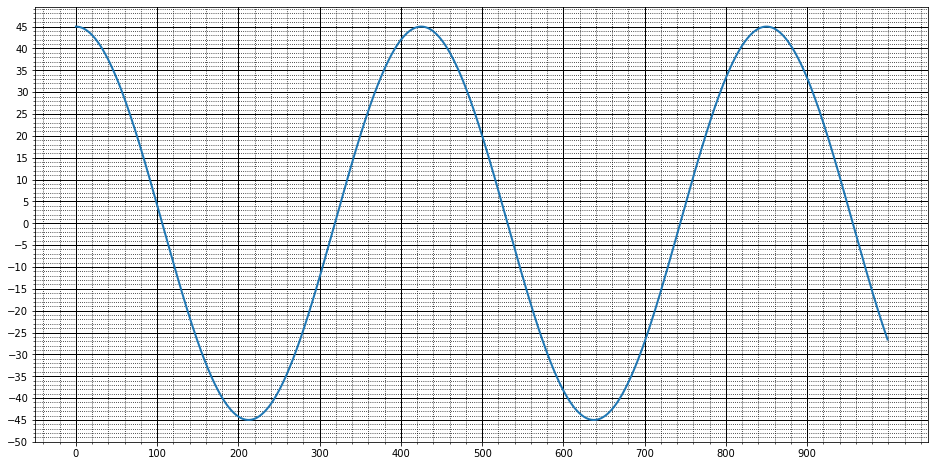

In [17]:
draw_signal(test_data['task2']['a'])

In [18]:
A = 45
T = 425
w = 2 * np.pi / T
phi = 0
t = np.arange(1000)

a = A * np.cos(w * t + phi)

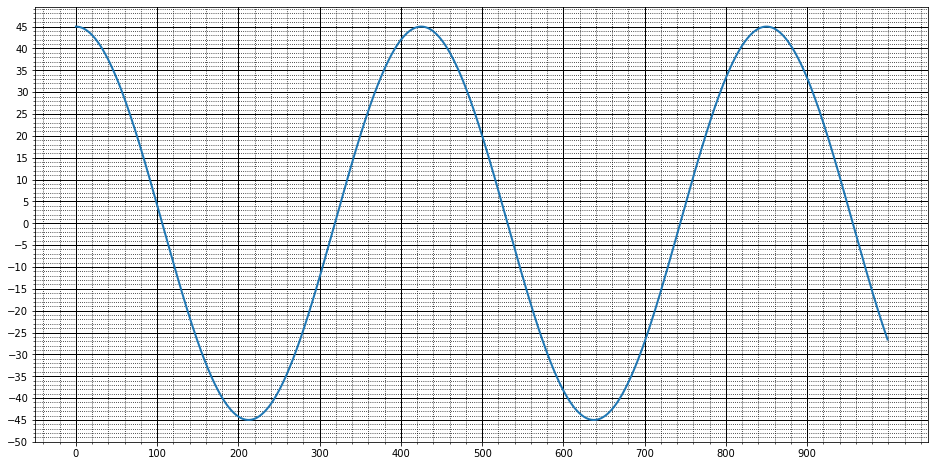

In [19]:
draw_signal(a)

In [20]:
assert 1000 == len(a)
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


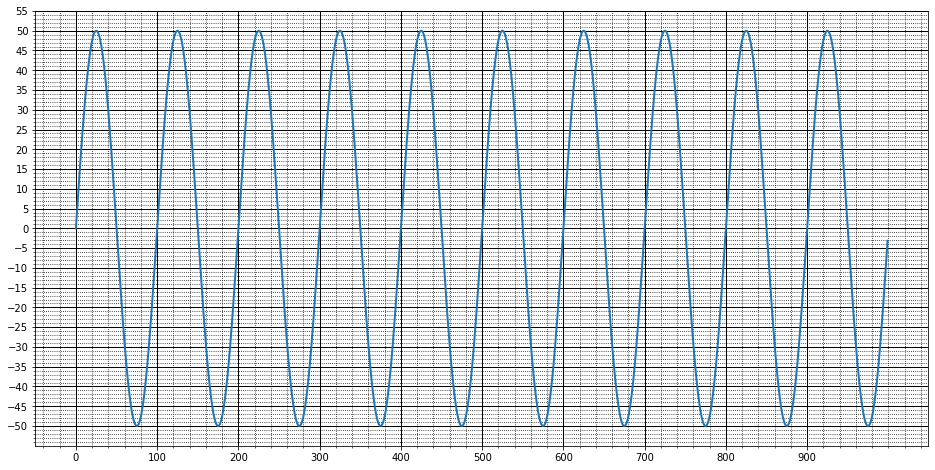

In [21]:
draw_signal(test_data['task2']['b'])

In [22]:
A = 50
T = 100
w = 2 * np.pi / T
phi = 0
t = np.arange(1000)

b = A * np.sin(w * t + phi)

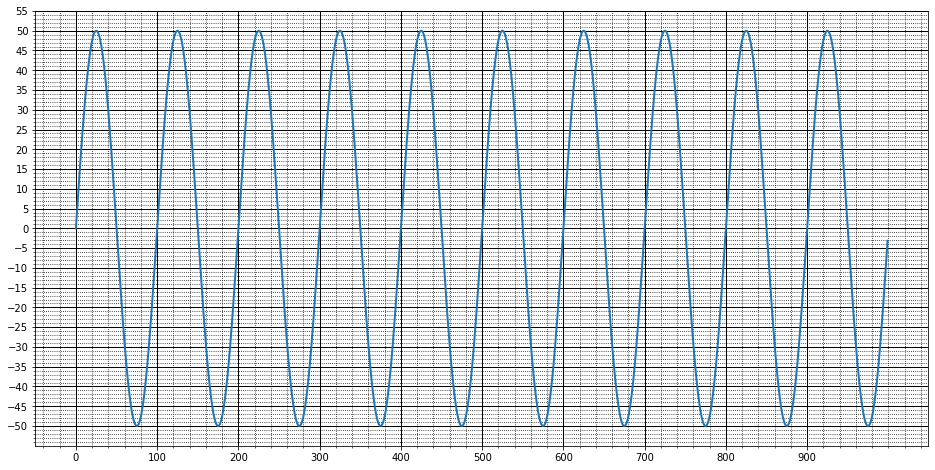

In [23]:
draw_signal(b)

In [24]:
assert 1000 == len(b)
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


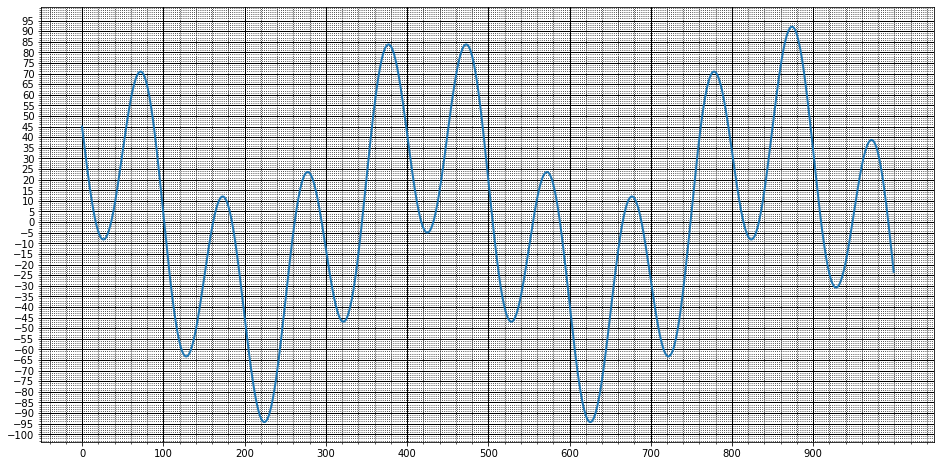

In [25]:
draw_signal(test_data['task2']['c'])

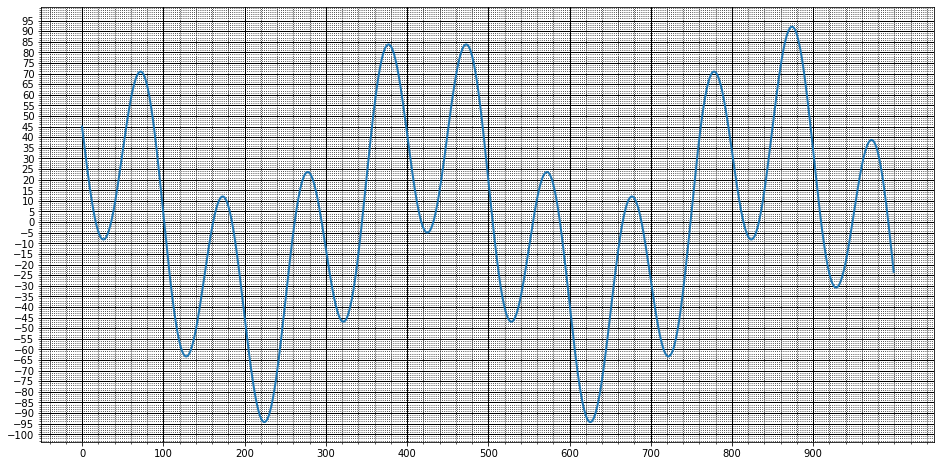

In [26]:
A_0 = 45
T_0 = 425
w_0 = 2 * np.pi / T_0
phi_0 = 0

A_1 = 50
T_1 = 100
w_1 = 2 * np.pi / T_1
phi_1 = np.pi / 2

t = np.arange(1000)

c = A_0 * np.cos(w_0 * t + phi_0) + A_1 * np.cos(w_1 * t + phi_1)
draw_signal(c)

In [27]:
assert 1000 == len(c)
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свёртка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с её помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям *f* и *g* и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой. Другими словами, преобразование свёртки однозначно определяет выходной сигнал *y(t)* для установленного значения входного сигнала *x(t)* при известном значении функции импульсного отклика системы *h(t)*.

![convolution-gif](resources/Convolution_of_box_signal_with_itself2.gif)

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t - \tau)d\tau$$
где $\tau$ — длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией `scipy.signal.convolve`. Постройте графики фильтра, исходного сигнала и результата свертки.

In [28]:
def convolve(in1, in2):
    # make in1 the largest signal of the given two
    if len(in1) < len(in2):
        in1, in2 = in2, in1

    # use zero-padding
    result = np.zeros((len(in1) + len(in2) - 1))
    kernel = in2[::-1]

    for i in range(len(result)):
        left = max(0, i - len(in2) + 1)
        right = min(i, len(in1) - 1) + 1
        for j in range(left, right):
            result[i] += in1[j] * kernel[i - j]

    return result

In [29]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [30]:
a = np.repeat([0, 1, 0], 10)
b = np.array([0, 1, 2, 3, 2, 1, 0])

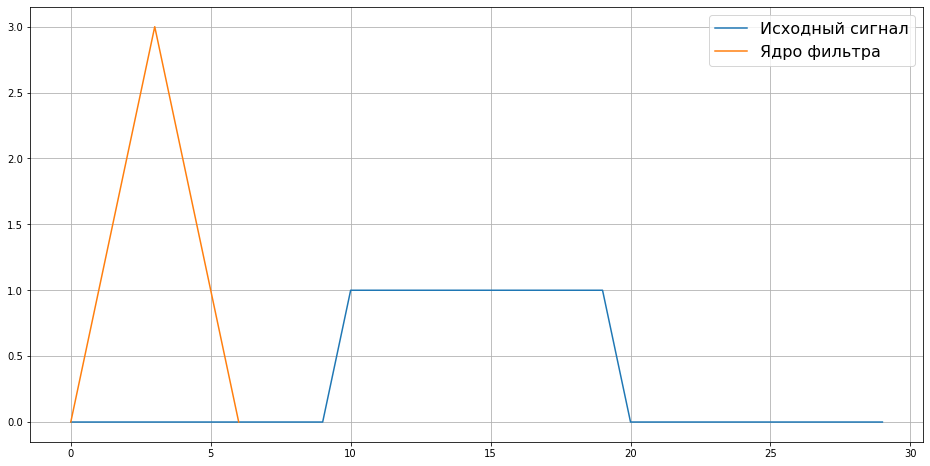

In [31]:
# Графики фильтра и исходного сигнала
plt.figure(figsize=(16, 8))
plt.plot(a, label="Исходный сигнал")
plt.plot(b, label="Ядро фильтра")
plt.grid(True)
plt.legend(fontsize=16);

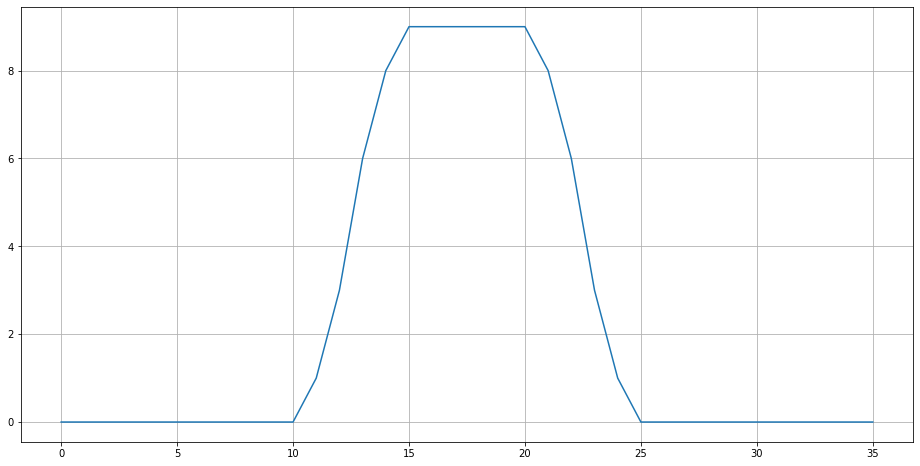

In [32]:
# Результат свёртки a и b
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.plot(convolve(a, b));

In [33]:
test_convolve(a, b, print_debug=False)

Ok!


# Задание 4*. Алгоритм Карплуса-Стронга 

Реализуйте  [алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчётов. Проверьте результат.

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [34]:
def karplus_strong(noise, n):
    # noise — input
    # n — number of samples to generate
    # return y — generated signal based on noise
    y = np.zeros(n)
    y[:len(noise)] = noise
    for i in range(len(noise), n):
        y[i] = (y[i - len(noise)] + y[i - len(noise) - 1]) / 2
    return y

In [35]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency)))  # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), (
    "Generated signal must start with noise."
)
assert np.allclose(gen_wav[len(noise)], (noise[0]) / 2), (
    "Out of range samples eq 0."
)
assert np.allclose(
    gen_wav[len(noise) + 1 : 2 * len(noise)],
    (noise[:-1] + noise[1:]) / 2
), ("Bad requrent rule.")
assert np.allclose(gen_wav[2 * len(noise)], (noise[0] / 2 + noise[-1]) / 2)
assert np.allclose(
    gen_wav[2 * len(noise) + 2 : 3 * len(noise)],
    (((noise[:-1] + noise[1:]) / 2)[:-1] +
     ((noise[:-1] + noise[1:]) / 2)[1:]) / 2
)
print("All Ok!")

All Ok!


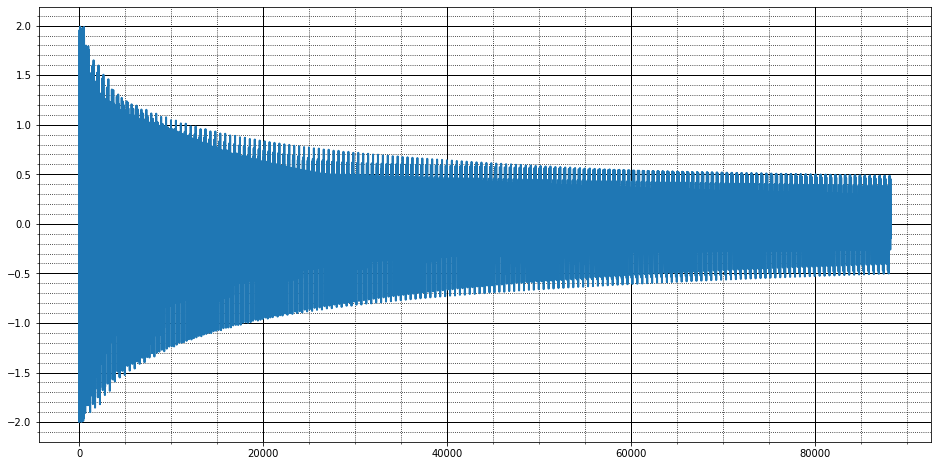

In [36]:
draw_signal(gen_wav, figsize=(16, 8), ticks=False)

In [37]:
# Нота из примера - ми большой октавы:
ipd.Audio(gen_wav, rate=sample_rate)

Параметры генерации влияют на следующее:
* `sample_rate` (частота дискретизации, или число отсчётов в секунду) — на восстанавливаемость сигнала после оцифровки и размер памяти, занимаемой оцифрованным сигналом;
* `frequency` (частота генерируемого сигнала) — на высоту звука;
* `sec` — на длительность звука в секундах.

In [38]:
# Функция для имитации звучания разных струн гитары
def generate_sound(sample_rate=44100, frequency=82.41, duration=2, seed=1):
    np.random.seed(seed=seed)
    gen_len = sample_rate * duration
    noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency)))
    return karplus_strong(noise, gen_len)

In [39]:
# Ля большой октавы:
ipd.Audio(generate_sound(frequency=110.00, sample_rate=44100), rate=44100)

In [40]:
# Ре малой октавы:
ipd.Audio(generate_sound(frequency=146.83, sample_rate=44100), rate=44100)